In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv('Weight-Height Polynomial Dataset.csv')
df.shape

(50, 2)

In [148]:
df.head()

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292


## First I will use Linear Regression and see why we need Polynomial Regression

In [149]:
X = df[['Weight']]
y = df[['Height']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

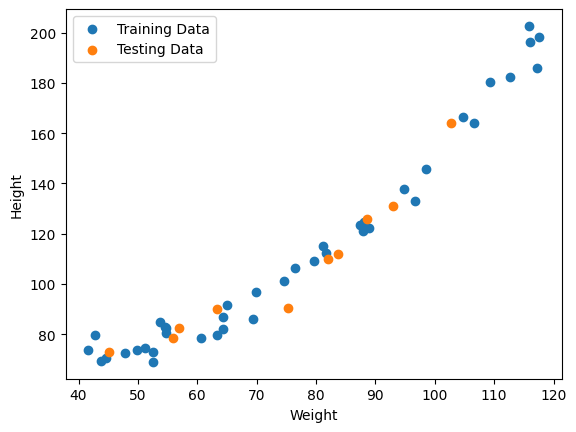

In [150]:
# Lets plot the training and testing data
plt.scatter(X_train, y_train, label= 'Training Data')
plt.scatter(X_test, y_test, label= 'Testing Data')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.show()

Here, we can clearly see that our dataset is some kind of **non-linear**.

In [151]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [152]:
print(lr.coef_)
print(lr.intercept_)

[[1.67059514]]
[-13.91658685]


In [153]:
y_pred = lr.predict(X_test)
y_pred

array([[ 81.28583371],
       [111.73254818],
       [134.10413699],
       [141.45173952],
       [123.03966238],
       [125.97374169],
       [ 79.59314281],
       [157.84411047],
       [ 61.6012088 ],
       [ 91.82929771]])

In [154]:
r2_score(y_test, y_pred)

0.8403417139170934

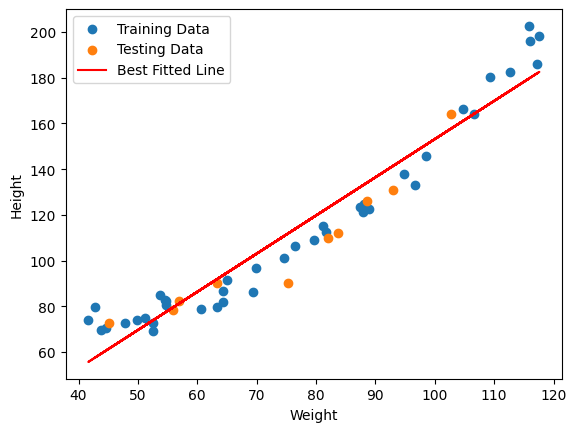

In [155]:
# Lets plot the training and testing data
plt.scatter(X_train, y_train, label= 'Training Data')
plt.scatter(X_test, y_test, label= 'Testing Data')
plt.plot(X_train, lr.predict(X_train), color='red', label='Best Fitted Line')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.show()

Here, we can clearly see that in non-linear data we **cannot find a best fitted line** that's where Polynomial Regression comes.

## Solving the same data using Polynomial Regression

In [156]:
# Applying polynomial of degree 2
poly = PolynomialFeatures(degree=3, include_bias=True)

# Transform X_train and X_test into degree 2 polynomial
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [157]:
X_train.iloc[0:1,0:1]

,Weight
12,106.595411


In [158]:
print(X_train.iloc[0:1,0:1])
print(X_train_trans[0])

        Weight
12  106.595411
[1.00000000e+00 1.06595411e+02 1.13625817e+04 1.21119907e+06]


In [159]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [160]:
y_pred = lr.predict(X_test_trans)

In [161]:
r2_score(y_test,y_pred)

0.9717512729010058

In [162]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.00000000e+00 -2.20475236e+00  2.98427813e-02 -4.39440842e-05]]
[116.2868235]


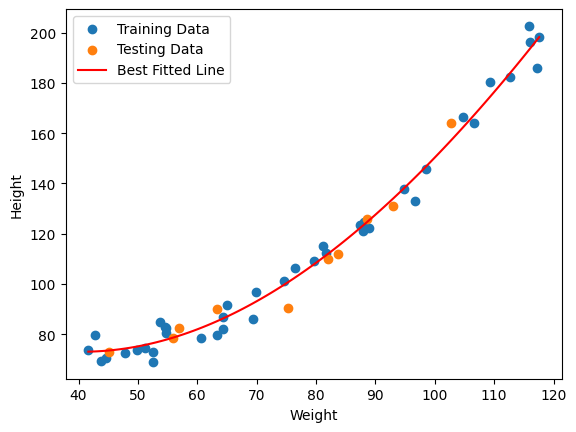

In [163]:
# Generate a smooth curve
X_curve = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_curve_trans = poly.transform(X_curve)
y_curve = lr.predict(X_curve_trans)

# Lets plot the training and testing data and best fited curve
plt.scatter(X_train, y_train, label= 'Training Data')
plt.scatter(X_test, y_test, label= 'Testing Data')
plt.plot(X_curve, y_curve, color='red', label='Best Fitted Line')
plt.xlabel("Weight")
plt.ylabel("Height")

plt.legend()
plt.show()